<a href="https://colab.research.google.com/github/shjoo0407/political_disposition/blob/main/eun/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import re, string
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/2023/sw공모전/data

/content/drive/MyDrive/2023/sw공모전/data


In [ ]:
# df1 = pd.read_csv('민주당2022.csv')
# df2 = pd.read_csv('국힘2022.csv')
# df3 = pd.read_csv('민주당2020.csv')
# df4 = pd.read_csv('국힘2020.csv')

In [ ]:
ls

'df_summarization(2022)'   국힘2020.csv      문재인.csv        박근혜.csv
 keras_model.h5            국힘2022.csv      문재인_국힘.csv   박근혜_국힘.csv
 NPP_final_0729.csv        노무현.csv        민주당2020.csv    이명박.csv
 TMP_final_0729.csv        노무현_국힘.csv   민주당2022.csv    이명박_국힘.csv


In [ ]:
pd.read_csv('문재인.csv')

,Unnamed: 0,content,target,content2
0,44111,자영업자와 소상공인은 기다릴 시간이 없습니다. 인수위는 안일한 태도를 버리기 바랍니...,민주당,자영업자 소상 공인 시간 수위 안일 태도 윤석열 인수 추경 관련 작업 인수 제출 윤...
1,44112,근거 없는 의혹 제기로 ‘망신주기’에 혈안이 된 국민의힘과 일부 언론에 강한 유감을...,민주당,근거 의혹 제기 망신 주기 혈안 국민 일부 언론 유감 일부 언론 국민 연일 김정숙 ...
2,44113,"윤호중 공동비상대책위원장 소상공인, 자영업자 단체 대표님들, 그리고 함께하신 자영업...",민주당,윤호중 공동 비상대책위 원장 소상 공인 자영업자 단체 대표 자영업 사장 반갑습니다 ...
3,44114,"간병문제, 정치권이 책임 있게 응답해야 합니다 오늘 대법원은 경제적 이유로 뇌출혈로...",민주당,문제 정치 책임 응답 오늘 대법원 경제 이유 뇌출혈 아버지 방치 청년 징역 확정 판...
4,44115,일본의 역사왜곡에 함구하는 윤석열 당선인의 ‘올바른 역사인식’은 무엇인지 구체적으로...,민주당,일본의 역사 왜곡 함구 윤석열 선인 역사 인식 구체 일본의 역사 교과서 왜곡 문제 ...
...,...,...,...,...
9172,53284,"잘못 인정 안하는 박근혜 전 대통령, 누가 ‘사면’을 입 밖에 꺼내는가 구속된 박근...",민주당,인정 박근혜 대통령 사면 구속 박근혜 대통령 기소 변호인단 교체 거론 대통령 본인 ...
9173,53285,안철수 대표는 부적절한 사면 발언에 대해서 진솔하게 해명해야 한다 국민의당 안철수 ...,민주당,안철수 대표 사면 발언 해명 국민의당 안철수 대표 박근혜 대통령 사면 검토 여지 기...
9174,53286,"홍준표 블랙리스트 발언, 당장 사죄하라 자유한국당 홍준표 후보가 박근혜 정부의 문화...",민주당,홍준표 블랙리스트 발언 당장 사죄 자유 한국당 홍준표 후보 박근혜 정부 문화예술 블...
9175,53287,반기문 특사와 박근혜 사면이 안철수 후보의 자신감 이었나 안철수 후보가 어제 두 가...,민주당,반기문 특사 박근혜 사면 안철수 후보 자신감 안철수 후보 가지 정치공학 메시지 반기...


In [ ]:
4npp = pd.read_csv('NPP_final_0729.csv')
tmp = pd.read_csv('TMP_final_0729.csv')

In [ ]:
print(npp.shape)
print(tmp.shape)

(40452, 4)
(39477, 4)


In [ ]:
npp['target'] = 'npp'
tmp['target'] = 'tmp'

df = pd.concat([npp, tmp]).reset_index()

In [ ]:
df.head(3)

,index,category,year,quarter,content,target,title
0,0,대변인 보도자료 및 브리핑,2023,3,‘빗물을 나르는 고속도로’라 불리는 대심도 빗물터널 조금 전에 둘러보고 왔다. 신월...,npp,NaN
1,1,대변인 보도자료 및 브리핑,2023,3,"오늘 한 언론에 보도된 무소속 박완주 의원의 검찰 공소장 안에는, 강력 성범죄자의 ...",npp,NaN
2,2,대변인 보도자료 및 브리핑,2023,3,전국적인 집중호우로 많은 국민들이 희생되고 막대한 재산 피해가 발생했다. 당장 전면...,npp,NaN


In [ ]:
df = df[['content','target']]

In [ ]:
df['target'].value_counts()

npp    40452
tmp    39477
Name: target, dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

content    0
target     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target'])

df.head()

,content,target,target_encoded
0,‘빗물을 나르는 고속도로’라 불리는 대심도 빗물터널 조금 전에 둘러보고 왔다. 신월...,npp,0
1,"오늘 한 언론에 보도된 무소속 박완주 의원의 검찰 공소장 안에는, 강력 성범죄자의 ...",npp,0
2,전국적인 집중호우로 많은 국민들이 희생되고 막대한 재산 피해가 발생했다. 당장 전면...,npp,0
3,더불어민주당이 윤석열 정부의 ‘시행령 추진’에 본격적으로 제동을 걸고 있다. KBS...,npp,0
4,"그칠 줄 모르던 비가 잠시 소강상태에 접어들었지만, 폭우가 할퀴고 간 자리에 남겨진...",npp,0


In [ ]:
df['target_encoded'].unique()

array([0, 1])

### Text Classification


In [ ]:
import tensorflow as tf

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs


In [ ]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs) # 첫번째 서브층 : 멀티 헤드 어텐션
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # 두번째 서브층 : 포지션 와이즈 피드 포워드 신경망
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm


In [ ]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split


# X_train, X_test, y_train, y_test = train_test_split(df['content'], df['target_encoded'], test_size=0.2, random_state=42, shuffle=True)

# print('Number of training reviews: {}'.format(len(X_train)))
# print('Number of testing reviews: {}'.format(len(X_test)))

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_temp, y_train, y_temp = train_test_split(df['content'], df['target_encoded'], test_size=0.2, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

print('Number of training reviews: {}'.format(len(X_train)))
print('Number of testing reviews: {}'.format(len(X_test)))
print('Number of validation reviews: {}'.format(len(X_val)))

Number of training reviews: 63941
Number of testing reviews: 7993
Number of validation reviews: 7993


In [ ]:
max_len = 1024
vocab_size = 20000  # 빈도수 상위 2만개의 단어만 사용

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Convert text to integer sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)


# Pad sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len)

print('Shape of X_train_padded:', X_train_padded.shape)
print('Shape of X_test_padded:', X_test_padded.shape)
print('Shape of X_val_padded:', X_val_padded.shape)

Shape of X_train_padded: (63941, 1024)
Shape of X_test_padded: (7993, 1024)
Shape of X_val_padded: (7993, 1024)


In [ ]:
embedding_dim = 32  # 각 단어의 임베딩 벡터의 차원
num_heads = 2 # 어텐션 헤드의 수
dff = 64  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기

inputs = tf.keras.layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
# history = model.fit(X_train_padded, y_train, batch_size=256, epochs=50, validation_data=(X_test_padded, y_test))

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_padded, y_train, batch_size=256, epochs=50,  validation_data=(X_val_padded, y_val), callbacks=[early_stopping])

In [ ]:
ls

'df_summarization(2022)'   국힘2020.csv      문재인.csv        박근혜.csv
 keras_model.h5            국힘2022.csv      문재인_국힘.csv   박근혜_국힘.csv
 NPP_final_0729.csv        노무현.csv        민주당2020.csv    이명박.csv
 TMP_final_0729.csv        노무현_국힘.csv   민주당2022.csv    이명박_국힘.csv


In [ ]:
from tensorflow import keras
model = keras.models.load_model('keras_model.h5')

In [ ]:
from sklearn.metrics import classification_report

loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# 예측값 생성
y_pred = model.predict(X_test_padded)

# 정밀도, 재현율, F1 점수 계산
report = classification_report(y_test, y_pred.argmax(axis=1))
print(report)

250/250 [==============================] - 4s 17ms/step


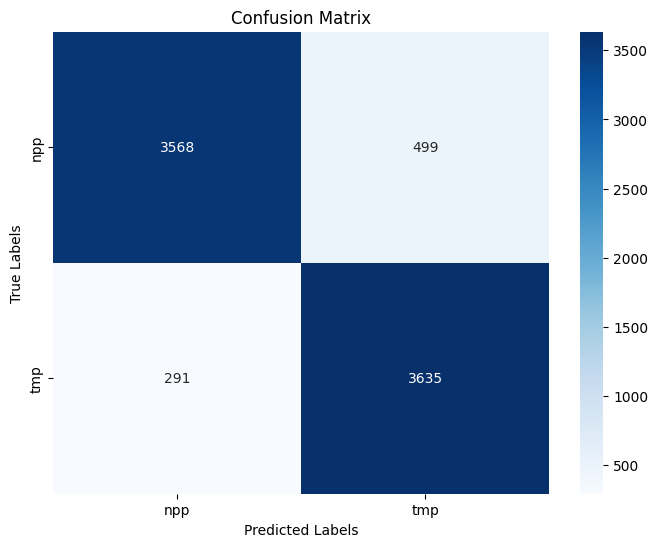

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test_padded)
y_pred_classes = y_pred.argmax(axis=1)

class_names = ["npp","tmp"]


cm = confusion_matrix(y_test, y_pred_classes)

# 오차 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

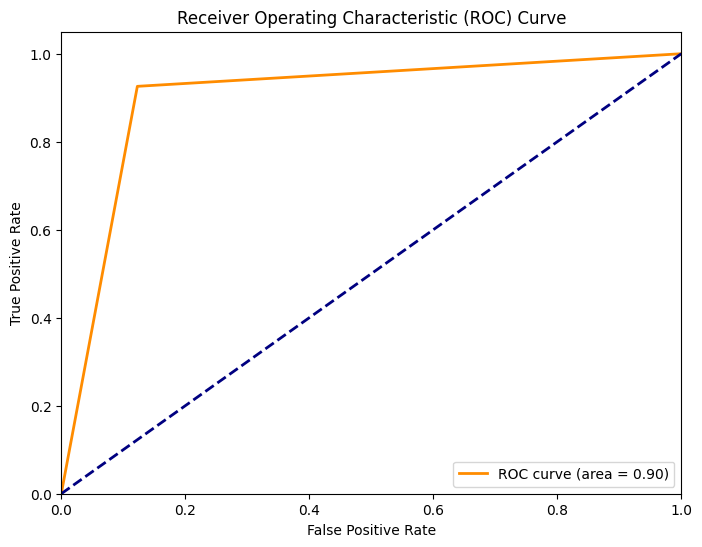

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
text_to_predict = """
최근 정치권의 가장 큰 화두는 ‘청와대 이전’이다. 윤석열 대통령 당선인(이하 윤 당선인)은 청와대를 공원 및 박물관 등 시민들을 위한 공간으로 전환하고,
광화문 정부청사에 대통령실을 만들 것이라고 밝힌 바 있다. 임기 시작일부터 국민에게 청와대를 돌려주겠다고 호헌 장담하는 등 청와대 이전에 유난히 집중하고 있는 모습이다.
그러나 광화문에 대통령실을 만들겠다는 약속과 5월 10일에 바로 청와대를 국민에게 돌려주겠다는 약속을 지키지 못할 가능성이 높아지고 있다.
윤 당선인은 본래의 약속이었던 ‘광화문 대통령’ 대신, 경호와 비용 등을 이유로 용산으로 집무실을 옮기는 것으로 해당 공약을 대체하겠다고 밝혔다.
게다가 곧 여당이 될 국민의힘 내부에서도 청와대에 몇 년 더 머물다 이전하자는 등 섣부른 청와대 이전에 대한 우려가 나오고 있다.
정치권 내부뿐만 아니라 국민들도 청와대 이전에 반대하고 있다. 최근 여론조사 결과 용산으로 이전하는 것에 58%가 반대, 33%가 찬성했다.
가장 큰 문제는 명분이 없다는 것이다. 반드시 청와대를 폐지하거나 이전해야 한다는 생각을 가진 국민은 많지 않다.
어느 정치인의 말처럼, 중요한 것은 장소가 아닌 사람이며, 조직이 아닌 신념이기 때문이다.
국민을 진정으로 존중하는 대통령은 용산에 있든, 광화문에 있든, 청와대에 있든 국민을 위한 정책을 펼쳐나갈 수 있을 것이고, 조직이 문제라면 청와대 구성원이나 내부 체계를 개혁하면 될 일이다.
청와대는 지난 1948년 이승만 초대 대통령이 대통령 집무실로 사용하기 시작한 이후 70년이 넘는 세월 동안 대한민국 행정부의 중심이자 상징으로 존재해왔다.
이러한 역사적, 정치적 장소를 굳이 이전하려는 것은 윤 당선인이 본인의 공략을 밀어붙이려는 억지로 보이기도 한다. 국민들은 청와대 이전을 위해 윤 당선인을 뽑은 것이 아님을 여론조사 결과가 증명하고 있다.
국민들과 소통을 하고 싶다면서, 국민들이 원하지 않는 것을 밀어붙이는 것은 국민에 대한 ‘폭력’이다.
임기를 시작하기도 전에 국민의 뜻을 거스르지 않기를 바라고, 대부분의 국민이 공감할 수 있는 합리적인 대안을 제시하기를 바란다.
"""

# 텍스트 전처리 및 패딩
input_sequence = tokenizer.texts_to_sequences([text_to_predict])
input_sequence = pad_sequences(input_sequence, maxlen=max_len)

# 모델 예측
output = model.predict(input_sequence)

# 예측된 클래스 인덱스
predicted_class_index = output.argmax().item()

# 원래의 클래스 이름으로 변환
predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]

# 예측 결과 출력
print("Predicted Class:", predicted_class_name)
# 클래스별 확률값 출력
for class_idx, prob in enumerate(output[0]):
    class_name = "npp" if class_idx == 0 else "tmp"
    print(f"Probability for {class_name}: {prob:.4f}")

1/1 [==============================] - 0s 25ms/step
Predicted Class: npp
Probability for npp: 0.5161
Probability for tmp: 0.4839


In [ ]:
text_to_predict1 = """
일본 정부가 이르면 24일 후쿠시마 제1원자력발전소의 오염수(일본 측은 ‘처리수’로 표기)를 해양 방류할 것이라고 일본 언론들이 21일 보도했다.
NHK와 교도통신에 따르면 기시다 후미오 총리는 22일 각료 회의를 열고 이 같은 방류 일정을 의결할 예정이다.
기시다 총리는 21일 도쿄의 총리 관저에서 방류를 반대해온 전국어업협동조합연합회 사카모토 마사노부 회장을 만나,
“해양 방류는 안전하게 완수할 것”이라며 “어민들이 안심하고 생업을 계속할 수 있도록 필요한 대책을 취하겠다”고 말했다.
이에 사카모토 회장은 “반대 입장은 변함이 없다”면서도 “(처리수가) 과학적으로 안전하다는 이해는 어민들 사이에서도 더욱 깊어졌다”고 말했다.
NHK는 “정부와 어민 단체 사이에 일정 정도의 의견 접근이 이뤄진 것으로 보인다”며 “기시다 내각이 24일 이후에 가능한 한 빨리 방류를 시작하는 방향으로 최종 입장을 조율하고 있다”고 보도했다.
같은 날 니시무라 야스토시 일본 경제산업상도 “22일 각료 회의에서 오염수 해양 방류 시기를 판단한다”고 말했다.
20일 기시다 총리의 후쿠시마 원전 시찰에 이어 21일 어민 대표와 면담, 22일 각료 회의의 의결과 같이 일사불란하게 오염수 해양 방류의 수순을 밟고 있는 것이다.
"""

# 텍스트 전처리 및 패딩
input_sequence = tokenizer.texts_to_sequences([text_to_predict1])
input_sequence = pad_sequences(input_sequence, maxlen=max_len)

# 모델 예측
output = model.predict(input_sequence)

# 예측된 클래스 인덱스
predicted_class_index = output.argmax().item()

# 원래의 클래스 이름으로 변환
predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]

# 예측 결과 출력
print("Predicted Class:", predicted_class_name)
# 클래스별 확률값 출력
for class_idx, prob in enumerate(output[0]):
    class_name = "npp" if class_idx == 0 else "tmp"
    print(f"Probability for {class_name}: {prob:.4f}")

1/1 [==============================] - 0s 25ms/step
Predicted Class: npp
Probability for npp: 0.7684
Probability for tmp: 0.2316


In [ ]:
text_to_predict2 = """
한·미·일 정상회담을 앞두고 야 4당과 시민사회단체들이 일본 방사성 오염수 해양 투기를 반대하는 187만 8185명의 서명을 대통령실에 전달했다.
18일 오전 서울 용산구 대통령실 앞에서 야 4당(더불어민주당, 정의당, 기본소득당, 진보당)과 일본방사성오염수해양투기저지공동행동은 기자회견을 열어
“후쿠시마 오염수 해양투기가 임박한 이 순간까지 윤 대통령과 정부, 여당은 우리 바다와 국민의 안전을 지키기 위해 노력하지 않고 오히려 일본 정부를 대변하는 태도로 오염수 해양투기를 용인해 왔다”며
“해양투기를 반대하는 시민들의 준엄한 목소리에 답해야 한다”고 주장했다. 이들은 기자회견을 마친 뒤 전희경 대통령비서실 정부1비서관에게 서명을 전달했다.
"""

# 텍스트 전처리 및 패딩
input_sequence = tokenizer.texts_to_sequences([text_to_predict2])
input_sequence = pad_sequences(input_sequence, maxlen=max_len)

# 모델 예측
output = model.predict(input_sequence)

# 예측된 클래스 인덱스
predicted_class_index = output.argmax().item()

# 원래의 클래스 이름으로 변환
predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]

# 예측 결과 출력
print("Predicted Class:", predicted_class_name)
# 클래스별 확률값 출력
for class_idx, prob in enumerate(output[0]):
    class_name = "npp" if class_idx == 0 else "tmp"
    print(f"Probability for {class_name}: {prob:.4f}")

1/1 [==============================] - 0s 24ms/step
Predicted Class: tmp
Probability for npp: 0.2799
Probability for tmp: 0.7201


In [ ]:
text_to_predict3= """
한-일 정상회담 합의에 따라, 정부가 일본 후쿠시마 제1원자력발전소 오염수 해양 방류 관련 상황을 살펴볼 전문가 시찰단을 오는 23~24일 파견하기로 했다.
하지만, 한국 전문가들의 ‘시찰’이 오염수 방류를 강행하려는 일본 정부의 명분 쌓기에 들러리로 이용되고, 후쿠시마산 농수산물 수입 재개 압력으로 이어질 것이란 우려가 커지고 있다.
일본 정부가 국제원자력기구(IAEA) 차원이 아닌 개별 국가 등에 시찰을 허용한 것은 대만과 태평양 섬나라 18개국이 모인 ‘태평양도서국포럼’에 이어 한국이 세번째다.
문제는 대만과 태평양 국가 시찰단이 지난해와 올해 후쿠시마 현장을 방문했을 때, 담당자의 설명을 듣고, 오염수 탱크, 다핵종제거설비, 해저터널 등을 살펴보는 일정이 전부였다는 점이다.
일본 쪽에서 보여주고 싶은 장소와 자료를 볼 수 있을 뿐 별도의 자체 검증은 불가능했다.
이번에 개별 시찰까지 진행한 한국 정부가 안전성에 대해 구체적 문제를 제기하지 못하면,
고농도 방사성 물질이 섞인 오염수를 다핵종제거설비로 정화 처리한 뒤 올여름 후쿠시마 앞바다에 방류하겠다는 일본 정부의 계획에 ‘정당성’만 더해주는 셈이 된다.
더욱 우려스러운 것은 한국의 제대로 된 검증 없이 올해 여름 바다 방류가 시작되면 지금까지 지켜온 후쿠시마산 농수산물 수입 금지의 원칙도 흔들리게 된다는 점이다.
일본 정부는 후쿠시마가 안전하지 않다는 이미지가 계속되는 것은 각국의 농수산물 수입 금지 영향이 크다고 보고, 집요할 정도로 해제를 요구해왔다.
그 결과 애초 규제를 했던 55개 나라·지역 가운데 현재까지 수입을 금지하는 나라는 한국·중국 등 5곳뿐이다. 한국은 이와 관련해 세계무역기구에서도 일본에 승소했는데,
오염수 방류에 제대로 문제를 제기하지 못해 수입 금지 명분도 잃게 될 엄중한 상황에 처한 것이다.
‘한일 관계 개선’만 외치며 일본의 요구를 무조건 수용해온 윤석열 정부를 바라보는 여론의 근심은 커져간다.
국민의 건강과 안전, 바다와 수산업의 미래가 달린 문제마저 일본에 일방적으로 ‘퍼주기’ 하는 상황은 절대로 용납할 수 없다.
정부는 우선 검증단을 제대로 꾸리고, 안전성을 확인하기 전에는 오염수 방류를 하지 않겠다는 약속을 일본으로부터 받아야 한다.
독자적 검증 끝에 오염수 방류 연기를 일본 정부에 공식 요구한 태평양 18개국 등 국제사회와의 연대 가능성도 살펴야 한다.
"""

# 텍스트 전처리 및 패딩
input_sequence = tokenizer.texts_to_sequences([text_to_predict3])
input_sequence = pad_sequences(input_sequence, maxlen=max_len)

# 모델 예측
output = model.predict(input_sequence)

# 예측된 클래스 인덱스
predicted_class_index = output.argmax().item()

# 원래의 클래스 이름으로 변환
predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]

# 예측 결과 출력
print("Predicted Class:", predicted_class_name)
# 클래스별 확률값 출력
for class_idx, prob in enumerate(output[0]):
    class_name = "npp" if class_idx == 0 else "tmp"
    print(f"Probability for {class_name}: {prob:.4f}")

1/1 [==============================] - 0s 36ms/step
Predicted Class: npp
Probability for npp: 0.9068
Probability for tmp: 0.0932


In [ ]:
text_to_predict4= """
후쿠시마 오염수 방류가 초읽기에 들어가면서 찬반양론이 격화하고 있다. 오염수 방류에 대해 국민의 우려를 괴담과 선동으로 치부하고 앞장서서 일본 입장을 대변하는 정부와 여당의 태도를 도저히 이해할 수가 없다.
부산을 포함해서 한국과 태평양 연안에 있는 다른 나라의 어업인이나 일반인은 일본의 오염수 방류로 얻는 이득이 아무것도 없다. 그런데 왜 이들이 바다 환경의 방사능 오염에 직면해야 하는가. 일본 자국의 단기적 이익을 위해 인류 공동의 이익을 해치는 행위에 대해 왜 우리 정부가 앞장서서 일본을 옹호하고 있는가.
인간이 오염수를 방류해 만들 위험에 대해, 한번 방류하면 돌이킬 수 없는 위험에 대해, 후속 세대까지 지속할 위험에 대해, 전문가들 사이에서도 의견이 일치하지 않는 위험에 대해 불안해하는 국민에게 정부와 여당은 답해야 한다. 오염수 배출을 정당화하려면 오염수 배출에 따른 공동체의 이득이 경제·사회·환경적 해로움보다 커야 한다는 목소리에 대해서도 답해야 한다.
정부와 여당은 국민의 우려를 광우병 괴담과 선동이라고 주장한다. 광우병 파동 때 많은 국민이 촛불을 들었기 때문에 30개월 이하로 월령을 제한하고 특정 부위 수입을 금지하는 등 보건 주권과 검역 주권을 확보하는 계기가 됐다. 또한 소에게 먹이던 육골분, 맥주 찌꺼기 등 단백질 사료를 제한하는 미국의 정책을 이끌어냈다. 그 결과 미국은 세계동물보건기구(OIE)으로부터 광우병 청정국 지위를 얻을 수 있었다. 그럼에도 정부와 여당은 엄연한 사실을 부정하고 호도하고 있다.
후쿠시마 오염수에 대해 한국의 총리가 나서 과학적으로 전혀 문제가 없으며 마실 수도 있는 안전한 물이라고 한다. 그렇다면 일본이 방류하지 않고 자국에 가둬두고 공업용수나 농업용수로 사용하면 될 일이다. 일본 국내에 두는 건 위험하고 바다에 방류하는 건 문제가 없다니, 이런 논리적 모순이 어디 있는가.
오염수 방류에 따른 국민의 우려를 불식시키려면 명확한 과학적 데이터가 있어야 한다. 그러나 도쿄전력이라는 민간회사가 운영하는 후쿠시마 원자로는 사고가 난 뒤 지금은 어떤 상태인지 명확하지가 않다. 아무리 기사를 찾아봐도 원자로가 녹았다는 것까지는 확인 가능한데, 바닥에 있는 핵물질이 어떤 상태인지를 명확하게 알 수 없다. 방류하려는 오염수 속에 어떤 종류의 방사성 물질이 어느 정도의 농도로 들어가 있는지 그 누구도 모르는 상태다.
과학적으로 평가할 수 없는 상태에서 세슘이나 삼중수소 등 핵발전소 사고에서 나온 여러 다양한 방사성 물질이 퍼져 나가는데 모든 방사성 물질을 채집할 수 없다고 한다. 그래서 지표 물질로 보통 채집하기가 용이하고 정확도가 높은 것들을 채집한다. 세슘 같은 게 그 가운데 하나고 삼중수소도 그렇다. 그러니까 우리가 지표 물질로 채집한 것들의 유해성 논쟁을 지금 하고 있는 것이다. 기본 데이터가 없는데 해양생물에서 발견된 지표 물질의 농도를 가지고 오염수의 안전성이나 위험성에 대해 논의하는 것이 도대체 가능한 일인지 어처구니가 없다.
적어도 도쿄전력이 데이터를 갖고 있는지 여부를 정확하게 얘기해야 하고, 데이터를 갖고 있지 못하다면 왜 갖고 있지 않은지를 얘기해야 한다. 그 원자로 상태에서는 데이터를 확보하는 것 자체가 불가능한 수준의 오염이 있을 수 있다. 그래서 지금의 논쟁은 터무니없는 논쟁이다. 환경 안전성과는 무관한 핵확산 방지 기구인 국제원자력기구(IAEA)와 일본 민간회사의 중간에 일본 정부가 끼어 있으니 투명하게 하고 있는지 의구심을 떨칠 수가 없다. 도쿄전력은 사고가 일어난 뒤 자기들 총리 말도 듣지 않고 데이터를 숨기고 조작했다는 의혹이 제기된 바 있다. 그런데 지금 그곳에서 제공하는 데이터가 투명하다고 할 수 있을까. 이 문제를 판단하려면 필요한 정보가 있어야 하는데 정보 자체가 너무 빈약하다. 후쿠시마 오염수 문제는 판단을 보류하고 더 정확한 검증이 필요하다. 국민의 안전을 위한다면, 반대하는 국민을 설득하려면 투명한 정보 공개가 우선이다.
우리 정부와 여당은 일본 입장을 대변하고 오염수 방류를 서두를 필요가 있는가. 오염수 방류를 반대하는 대다수 국민의 소리를 먼저 듣기 바란다.
"""

# 텍스트 전처리 및 패딩
input_sequence = tokenizer.texts_to_sequences([text_to_predict4])
input_sequence = pad_sequences(input_sequence, maxlen=max_len)

# 모델 예측
output = model.predict(input_sequence)

# 예측된 클래스 인덱스
predicted_class_index = output.argmax().item()

# 원래의 클래스 이름으로 변환
predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]

# 예측 결과 출력
print("Predicted Class:", predicted_class_name)
# 클래스별 확률값 출력
for class_idx, prob in enumerate(output[0]):
    class_name = "npp" if class_idx == 0 else "tmp"
    print(f"Probability for {class_name}: {prob:.4f}")

1/1 [==============================] - 0s 72ms/step
Predicted Class: tmp
Probability for npp: 0.0467
Probability for tmp: 0.9533


### 형태소

In [ ]:
! pip install konlpy

In [ ]:
from konlpy.tag import Hannanum, Kkma, Komoran, Okt

In [ ]:
#불용어 사전 만들기
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

#### 형태소 분석기 비교

In [ ]:
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [ ]:
text = df['split_content2'][0]

In [ ]:
def extract_nouns_verbs(text, analyzer):
    pos = analyzer.pos(text)

    nouns = []  # 명사 저장할 리스트
    verbs = []  # 동사 저장할 리스트

    for word_tag in pos:
        word, tag = word_tag[0], word_tag[1]
        if tag.startswith("N"):  # 명사 태그
            nouns.append(word)
        elif tag.startswith("V"):  # 동사 태그
            verbs.append(word)

    return nouns, verbs


nouns_ko, verbs_ko = extract_nouns_verbs(text, komoran)
print("Komoran 명사:", nouns_ko)
print("Komoran 동사:", verbs_ko)

In [ ]:
def extract_nouns_verbs(text, analyzer):
    pos = analyzer.pos(text)

    nouns = []  # 명사 저장할 리스트
    verbs = []  # 동사 저장할 리스트

    for word, tag in pos:
        if tag.startswith("N"):  # 명사 태그
            nouns.append(word)
        elif tag.startswith("V"):  # 동사 태그
            verbs.append(word)

    return nouns, verbs

nouns_k, verbs_k = extract_nouns_verbs(text, kkma)
print("Kkma 명사:", nouns_k)
print("Kkma 동사:", verbs_k)

In [ ]:
def extract_nouns_verbs(text, analyzer):
    pos = analyzer.pos(text, ntags=22)

    nouns = []  # 명사 저장할 리스트
    verbs = []  # 동사 저장할 리스트

    for word, tag in pos:
        if tag.startswith("N"):  # 명사 태그
            nouns.append(word)
        elif tag.startswith("V"):  # 동사 태그
            verbs.append(word)

    return nouns, verbs

nouns_h, verbs_h = extract_nouns_verbs(text, hannanum)
print("Hannanum 명사:", nouns_h)
print("Hannanum 동사:", verbs_h)

In [ ]:
texts = df['split_content2']

data = []
for text in texts:
    nouns, verbs = extract_nouns_verbs(text, hannanum)
    data.append({'Text': text, 'Nouns': nouns, 'Verbs': verbs})

df['noun'] = pd.DataFrame(data)
df.head()

In [ ]:
df.to_csv('df.csv')